In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assignment - $k$-Nearest Neighbor Classification
 
k-Nearest Neighbor Classifier (abbreviated as k-NN) is a supervised learning algorithm for training classifiers. It is used to classify patterns, image processing, handwritten character recognition, text classification and many other applications. It is straightforward.

**Input:** A set $M$ of labeled observations (vectors), input vector $v$ that we would like to classify, and a positive integer $k$.

**Task:** Classify the vector $v$.

**Algorithm:** In the set $M$, find a subset $N$ of $k$ observations that are closest to $v$ out of all elements of $M$. These vectors are called *neighbors*. The pattern $v$ will be classified by the label which is assigned to the most vectors in $N$.

## Classification of patterns using 5-NN

The picture below shows the result of a classification of points in a plane using algorithm 5-NN. Three patterns (vectors) from the five closest patterns are classified as blue. Therefore, the pattern will also be classified as blue.

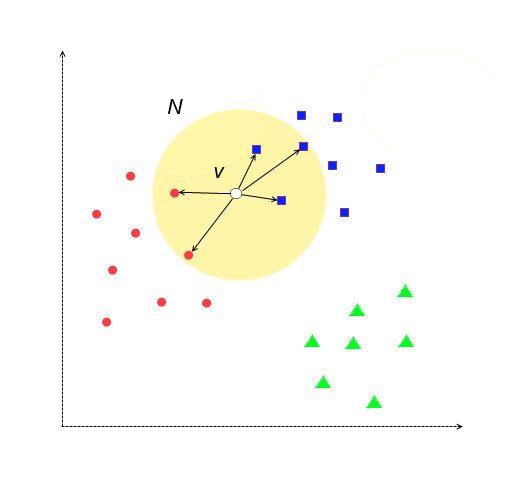!

## Implementing kNN-Algorithm

**Task 1:**  Implement kNN-algorithm as the following function:

In [108]:
from scipy.spatial.distance import cdist
import scipy.stats

def kNN(X, P, C, k, metric='euclidean'):
    # your code goes here
    assert k <= len(C), "Number of classified neighbors is smaller than k"
    xp_dist = cdist(X, P, metric)
    xp_dist_argsorted = np.argsort(xp_dist, axis=1)
    C_x = np.tile(C, (len(X), 1))
    C_x_sorted = np.take_along_axis(C_x, xp_dist_argsorted, axis=1)
    kNN_classes = C_x_sorted[:, :k]
    R, n_R = np.array(scipy.stats.mode(kNN_classes, axis=1))
    return R.ravel()

where
* `X` $\in \mathrm{R}^{n \times d}$ is a matrix containing vectors we would like to classify; each row of the matrix is a $d$-dimensional vector we need to classify,
* `P` $\in \mathrm{R}^{m \times d}$ is a matrix containing $m$ $d$-dimensional vectors (as rows) with a known classification, 
* `C` is a vector of length $m$ containing classification for all vectors in `P`, where `C[i]` is an integer code of the class of the vector `P[i]`
* `k` is the value of the parameter $k$ of $k$-NN algorithm,
* `metric` is the metric used to compute the distance between vectors; at least `euclidean` and `cityblock` should be possible for the Euclidean and Manhattan metrics, respectively.

The function should return vector `R` of length $n$ with classification for all patterns in `X` computed according to k-NN algorithm, where the distance between a pair of patterns is calculated using Euclidean distance. **Your implementation must not use any library function for computing kNN classification!** You can use, however, any function from the `numpy` and `scipy` library. E.g., for computing pairwise distances between vectors in two arrays `XA` and `XB`, you can use the function `cdist(XA, XB`*[, metric]*`)` from the module `scipy.spacial.distance`.

In [5]:
from scipy.spatial.distance import cdist

x = np.array([[0, 0],[2,0]])
y = np.array([[1,1],[2,2],[3,3]])
print(cdist(x,y,metric='euclidean'))
print(cdist(x,y,metric='cityblock'))

[[1.41421356 2.82842712 4.24264069]
 [1.41421356 2.         3.16227766]]
[[2. 4. 6.]
 [2. 2. 4.]]


Some other useful functions are `numpy.argsort` or `scipy.mode`. You need not use any advanced data structures or algorithms, as the function will be used on small sample sets only.

## Visualization of a Classification on a Plane

In the following tasks, we will visualize the k-NN algorithm results so that the class will be interpreted as a color using the colormap `plasma`. You can see a usage of colormap `plasma` in the following example.

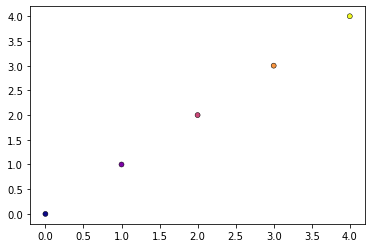

In [6]:
import matplotlib.cm as cm

plt.scatter(range(5), range(5), c=range(5), edgecolor='k', s=25, linewidth=0.5, cmap = cm.plasma)

Let `M` contain three two-dimensional patterns with classifications 0,1,2.

In [224]:
M = np.array([[-1, 0], [1, 1], [2, -1]])
C = np.arange(3)

We can cover the two-dimensional interval $\langle -3,4 \rangle \times \langle -3,3 \rangle$ with a mesh of points for which we will compute their classification using $1$-NN algorithm (the $k$-NN algorithm with $k=1$). Different classes will be marked with different colors and the following image can be produced.

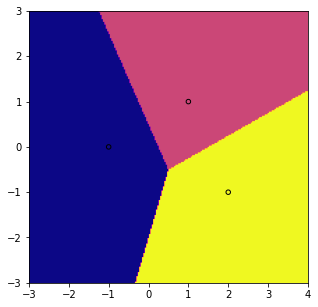

0

In [225]:
test_kNN(minx=-3, maxx=4, miny=-3, maxy=3, M=M, C=C, k=1, n=200, figsize=(5,5))

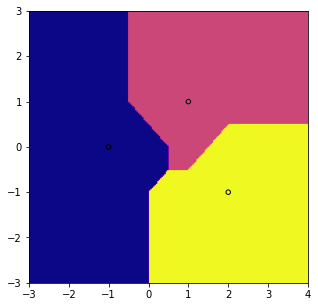

0

In [226]:
test_kNN(minx=-3, maxx=4, miny=-3, maxy=3, M=M, C=C, k=1, n=200, metric='cityblock', figsize=(5,5))

**Task 2:** Using your function `kNN()`, implement the following function

In [222]:
def reduce_points_to_interval(M,C,minx,maxx,miny,maxy):
    reduced_points, reduced_classes = [], []
    for point, cl in zip(M,C):
        if point[0] > minx and point[0] < maxx and point[1] > miny and point[1] < maxy:
            reduced_points.append(point)
            reduced_classes.append(cl)
    return np.array(reduced_points), np.array(reduced_classes)

def test_kNN(minx,maxx,miny,maxy,M,C,k,n,metric='euclidean',figsize=(4,4)):
    pix_w = (maxx-minx)/n
    pix_h = (maxy-miny)/n
    pixels = []
    for h in range(n):
        y = maxy - h*pix_h - pix_h/2
        for w in range(n):
            x = minx + w*pix_w + pix_w/2
            pixels.append([x,y])
    pixels_classes = kNN(pixels, M, C, k, metric)
    mesh = pixels_classes.reshape((n,n))
    plt.figure(figsize=figsize)
    plt.imshow(mesh, extent=(minx, maxx, miny, maxy), origin='upper', cmap=cm.plasma, aspect='auto')
    classif_M = kNN(M, M, C, k, metric)
    reduced_M, reduced_C = reduce_points_to_interval(M, C, minx, maxx, miny, maxy)
    plt.scatter(reduced_M[:,0], reduced_M[:,1], edgecolors='black', s=20, c=reduced_C, cmap=cm.plasma)
    plt.show()
    diff_C = C - classif_M
    return np.count_nonzero(diff_C != 0)


The function should plot an image similar to the above picture. The parameters of the function are:
* `minx` is the lower limit of the first coordinate,
* `maxx` is the upper limit of the first coordinate,
* `miny` is the lower limit of the second coordinate,
* `maxy` is the upper limit of the second coordinate,
* `M` is a matrix containing two-dimensional vectors,
* `C` is a vector of integers; `C[i]` is the classification the `i`-th row of `M`,
* `K` is the parameter $k$ of the $k$-NN algorithm,
* `n` is the number of "pixels" in each row and each column of the resulting image,
* `metric` is the metric used for computing the distance between vectors, and
* `figsize` is a pair of horizontal and vertical dimensions of the produced plot.
The function plots an image containing the points from `M`; points from the same class should be marked with the same color, different classes should be marked with different colors. You **cannot assume** that all points in `M` belong to the interval (`minx`;`maxx`)$\times$(`miny`;`maxy`). All other points of the interval should be painted in the color corresponding to the class to which they are classified using the $k$-NN algorithm with $k=$ `K`. The resolution of the image should be `n` $\times$`n` points. 

Besides plotting the image, the the function should return the number of vectors from `M` classified by the k-NN classifier differently from their class in `C`. 

For producing such a plot, you can use function `imshow` from `matplotlib`.

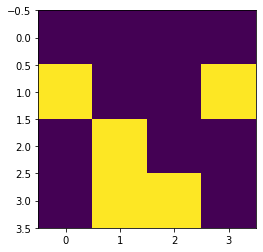

In [200]:
img= np.array([[0,0,0,0],
                [1,0,0,1],
                [0,1,0,0],
                [0,1,1,0]])
plt.imshow(img)

Note the ranges of the axes. Read the documentation for `imshow`. If we would like to have a picture with big "pixels" of width 1 with centers at (0,0),(1,0),(0,1) and (1,1), we can use the following.

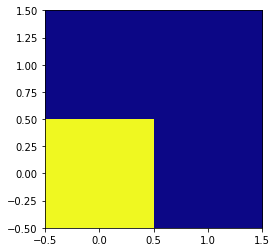

In [201]:
img = np.array([[0,0],
                [1,0]
               ])
plt.imshow(img, extent = (-0.5,1.5,-0.5,1.5),cmap=cm.plasma)

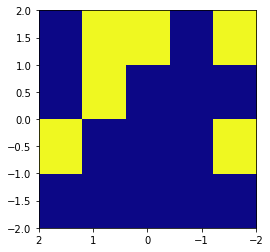

In [202]:
img= np.array([[0,0,0,0,0],
                [1,0,0,0,1],
                [0,1,0,0,0],
                [0,1,1,0,1]])
plt.imshow(img,extent=(2,-2,-2,2),origin='lower', cmap=cm.plasma)

Some sample calls of `test_kNN`:

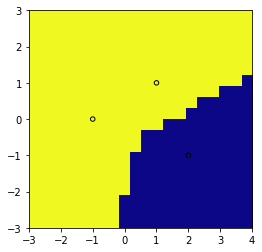

Wrongly classified 0 vectors


In [227]:
M = np.array([[-1, 0], [1, 1], [2, -1]])
C = np.array([1,1,0])
r = test_kNN(minx=-3, maxx=4, miny=-3, maxy=3, M=M, C=C, k=1, n=20)
print(f'Wrongly classified {r} vectors')

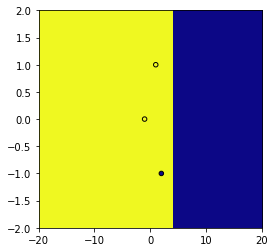

Wrongly classified 0 vectors


In [228]:
r = test_kNN(minx=-20, maxx=20, miny=-2, maxy=2, M=M, C=C, k=1, n=5)
print(f'Wrongly classified {r} vectors')

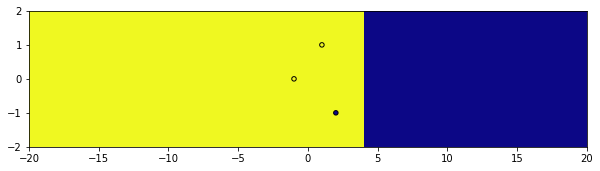

Wrongly classified 0 vectors


In [229]:
r = test_kNN(minx=-20, maxx=20, miny=-2, maxy=2, M=M, C=C, k=1, n=5, figsize=(10,2.5))
print(f'Wrongly classified {r} vectors')

## Testing k-NN Algorithm

Download the file `kNN_dataset.npz`, which you can find in moodle together with this assignment. When you read the using ```npzfile = np.load('kNN_dataset.npz')``` you can access arrays `M1`, `C1`, `M2`, `C2` as `npzfile['M1']`, `npzfile['C1']`, `npzfile['M2']` and `npzfile['C2']`, respectively.

In [230]:
npzfile = np.load('kNN_dataset.npz')
M1 = npzfile['M1']
C1 = npzfile['C1']
M2 = npzfile['M2']
C2 = npzfile['C2']

**Task 3:** Using your function `test_kNN` produce visualizations (using suitable ranges for both coordinates) for the set of vectors `M1` classified into classes in `C1` for `K=1`, `K=3` and `K=10`. Plot the results and compare them with respect to the value of `K`. Will the visualizations be different when we compute the distance between vectors using the `cityblock` metric?

dataset 1, k=1, euclidean distance.


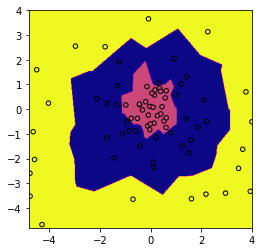

Wrongly classified 0 vectors

dataset 1, k=3, euclidean distance.


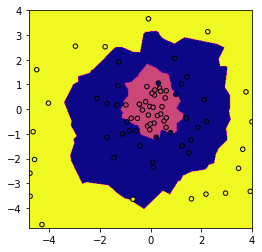

Wrongly classified 5 vectors

dataset 1, k=10, euclidean distance.


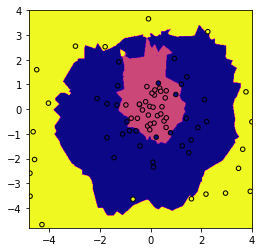

Wrongly classified 5 vectors

dataset 1, k=1, cityblock distance.


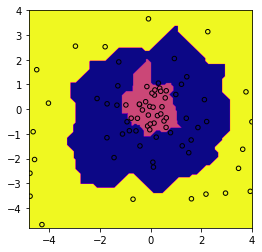

Wrongly classified 0 vectors

dataset 1, k=3, cityblock distance.


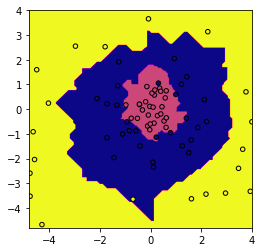

Wrongly classified 5 vectors

dataset 1, k=10, cityblock distance.


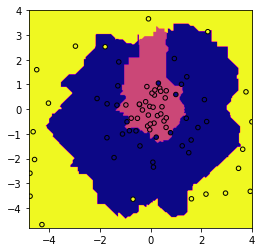

Wrongly classified 7 vectors



In [240]:
metrics=['euclidean', 'cityblock']
for metric in metrics:
    for k in [1,3,10]:
        print("dataset 1, k={}, {} distance.".format(k, metric))
        r = test_kNN(minx=-4.8, maxx=4, miny=-4.8, maxy=4, M=M1, C=C1, k=k, n=400, metric=metric)
        print(f'Wrongly classified {r} vectors')
        print()

**Task 3 ANSWER:** 

Compare the results with respect to the value of `K`: 
* As we would expect, using the `K=1` the classifier is overfitting and correctly classifying all the examples. In the case of this dataset, it looks like the `K=1` overfitting is not as bad as in some other datasets that are harder to separate and have less uniform distribution of points. We can also see that in case of `K=10` the parts of space that have less samples (x=[-1,1], y=[1,2]), the class with most samples in the not so close neighborhood "win" the classification. This is nice example of underfitting.

Will the visualizations be different when we compute the distance between vectors using the `cityblock` metric?:
* As we would expect, the borders between the different classes of "classification space" are more straight, because the borders can be only horizontal, vertical or with 45° tilt up and down as the manhattan distance is computed as sum of absolute values of differences between the two samples in each dimension.  

**Task 4:** Do the same as in Task 3 but for the array of vectors `M2` with classification `C2`. You may notice that the vectors in `M2` have a much bigger range of values in their second coordinate (the second column of `M2`) than in the first coordinate. Using `StandardScaler` from `sklearn.preprocessing`, normalize the values in the second coordinates of `M2` (only the second coordinate, not the first one!). Plot the corresponding visualizations with normalized `M2`. What is the difference in the visualization? Do you recommend any normalization before training and applying a k-NN classifier?

dataset 2, k=1, euclidean distance.


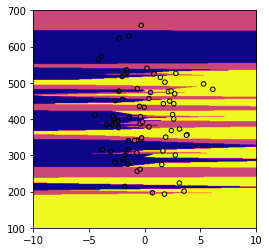

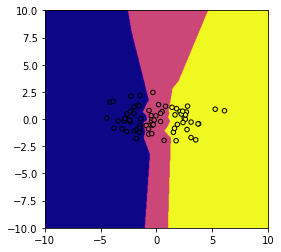

Wrongly classified classic:0, normalized:0 vectors

dataset 2, k=3, euclidean distance.


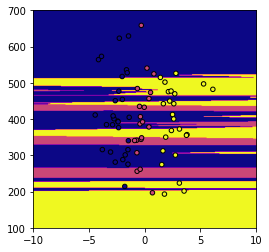

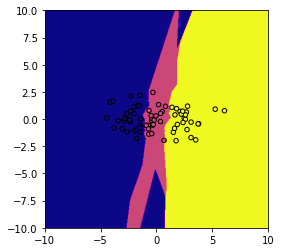

Wrongly classified classic:22, normalized:1 vectors

dataset 2, k=10, euclidean distance.


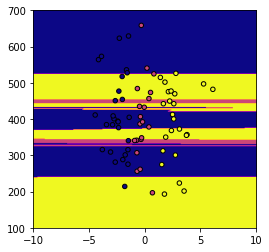

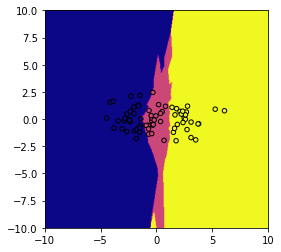

Wrongly classified classic:30, normalized:0 vectors

dataset 2, k=1, cityblock distance.


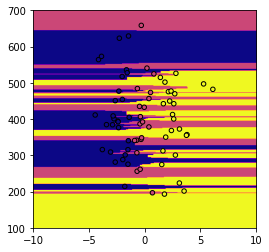

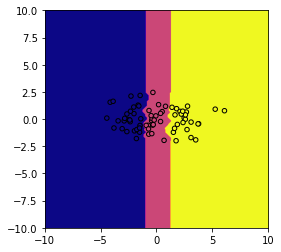

Wrongly classified classic:0, normalized:0 vectors

dataset 2, k=3, cityblock distance.


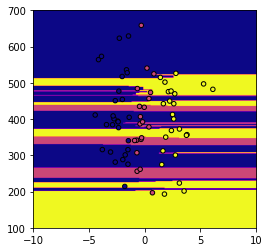

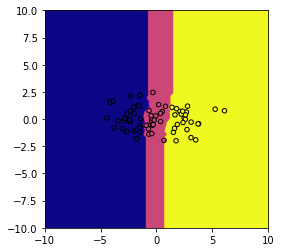

Wrongly classified classic:22, normalized:1 vectors

dataset 2, k=10, cityblock distance.


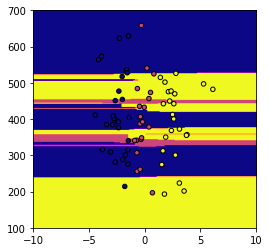

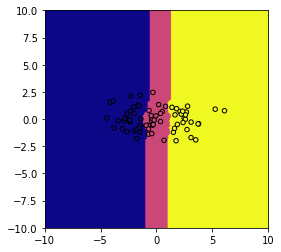

Wrongly classified classic:30, normalized:0 vectors



In [255]:
from sklearn.preprocessing import StandardScaler

M2_scaled = StandardScaler().fit_transform(M2)
M2_scaled[:,0] = M2[:,0,]

metrics=['euclidean', 'cityblock']
for metric in metrics:
    for k in [1,3,10]:
        print("dataset 2, k={}, {} distance.".format(k, metric))
        r = test_kNN(minx=-10, maxx=10, miny=100, maxy=700, M=M2, C=C2, k=k, n=400, metric=metric)
        r_scaled = test_kNN(minx=-10, maxx=10, miny=-10, maxy=10, M=M2_scaled, C=C2, k=k, n=400, metric=metric)
        print(f'Wrongly classified classic:{r}, normalized:{r_scaled} vectors')
        print()

**Task 4 ANSWER:** 

What is the difference in the visualization? 
* We can see that without normalization the value of second feature (y-axis) is much higher than value of first feature (x-axis). The distance therefore depends more on the second feature and it cause the mess we can see. When we normalize the second feature to similar range as first feature, the ckassification borders are much more reasonable and we can see that the three classes are divided with only few borders between them.

Do you recommend any normalization before training and applying a k-NN classifier?
* In case the features are independend on each other and one of the features which is not important for classification (decision border) is unreasonably overblown, it is reasonable to apply normalization on that feature so that there isn't some feature with high values that cause the classifier to decide mostly based on the value of this overblown feature.

**Task 5 (optional):** (in case you lose some points in the previous tasks, your correct solution of Task 5 will add 1 point to your score the whole asignment): Show an example (using two-dimensional sample vectors and `test_kNN` function) in which normalizing before applying k-NN classifier produces worse result that without the normalization.

k=1, euclidean distance.


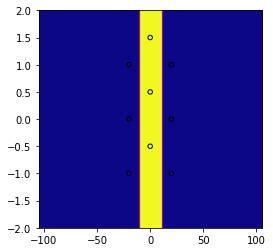

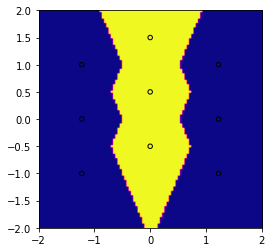

Wrongly classified classic:0, normalized:0 vectors

k=3, euclidean distance.


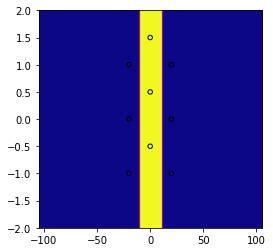

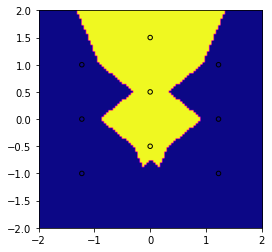

Wrongly classified classic:0, normalized:0 vectors

k=1, cityblock distance.


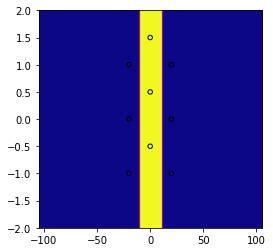

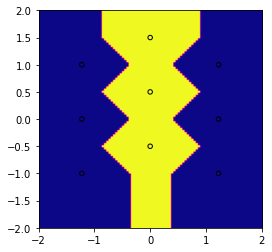

Wrongly classified classic:0, normalized:0 vectors

k=3, cityblock distance.


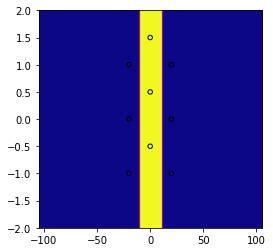

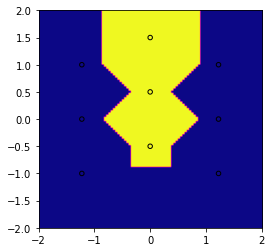

Wrongly classified classic:0, normalized:0 vectors



In [270]:
M = np.array([[-20,-1],[-20,0],[-20,1],[0,-0.5],[0,0.5],[0,1.5],[20,-1],[20,0],[20,1]])
C = [0,0,0,1,1,1,0,0,0]

M_scaled = StandardScaler().fit_transform(M)
M_scaled[:,1] = M[:,1,]
metrics=['euclidean', 'cityblock']
for metric in metrics:
    for k in [1,3]:
        print("k={}, {} distance.".format(k, metric))
        r = test_kNN(minx=-105, maxx=105, miny=-2, maxy=2, M=M, C=C, k=k, n=100, metric=metric)
        r_scaled = test_kNN(minx=-2, maxx=2, miny=-2, maxy=2, M=M_scaled, C=C, k=k, n=100, metric=metric)
        print(f'Wrongly classified classic:{r}, normalized:{r_scaled} vectors')
        print()


**Task 5 ANSWER:** 
If the feature being normalized is useful for the classification decision, then changing (lowering) its influence on classification by scaling can be counterproductive and may cause worse performance. For example if the data form three clusters as in the example above and the x,y axes are space coordinates with same units, then normalizing just the x axis does not make sense as we will lose the information that the clusters are far apart in the x direction while we cannot decide about their separation in the y direction.

Submit your solution as a Jupyter notebook. If you will submit more files, save them as a Zip-archive.